<a href="https://colab.research.google.com/github/michaelwnau/_ai_academy_notebooks/blob/main/Week10_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 10 [Student]

This notebook will cover the following topics:

1. Basic statistics
    - Central Tendancy
    - Feature Scaling
2. Visualization
    - Plots
3. Final project

## 10.1 BASIC STATISTICS (Follow)

**Learning Objectives**
1. Understand mean, median, and mode and when to use each and what they mean
2. Understand standard deviation
3. Understand Z-Score
4. Understand normalization

In [4]:
"""
Add comments for you own reference
"""

import pandas as pd
import numpy as np


speed = pd.Series([99,86,87,88,111,86,103,87,94,78,77,85,86])
#print(speed)
print(speed.mean())
print(speed.median())
print(speed.mode())
print(speed.std())
values, counts = np.unique(speed, return_counts=True)
print(values, '\n', counts)

velocity = pd.Series([99,86,87,88,111,86,103,87,94,78,77,85,86, 1000000])
# print(velocity)
print(velocity.mean())
print(velocity.median())
print(velocity.mode())
print(velocity.std())

postal_codes = pd.Series([52801, 52802, 52803, 52801, 78318, 90210, 77318, 27511, 27513, 27514, 49093, 49008])
# print(postal_codes)
print(postal_codes.mean())
print(postal_codes.median())
print(postal_codes.mode())
print(postal_codes.std())


89.76923076923077
87.0
0    86
dtype: int64
9.636336148089395
[ 77  78  85  86  87  88  94  99 103 111] 
 [1 1 1 3 2 1 1 1 1 1]
71511.92857142857
87.0
0    86
dtype: int64
267237.2502366978
53141.0
52801.0
0    52801
dtype: int64
20442.56297309833


In [5]:
"""
Add comments for you own reference
"""
#https://www.scribbr.com/statistics/normal-distribution/#:~:text=In%20a%20normal%20distribution%2C%20data%20are%20symmetrically%20distributed%20with%20no,same%20in%20a%20normal%20distribution.
#https://www.geeksforgeeks.org/normalization-vs-standardization/

def standardize(X, mean, std):
    standardized_val = (X-mean)/std
    return standardized_val

def normalize(X, X_max, X_min):
    normalized_value = (X-X_min)/(X_max-X_min)
    return normalized_value


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
Add comments for you own reference
""" 
print("--- speed ---")
for item in speed:
    print("St: ",standardize(item, speed.mean(), speed.std()))
    print("No: ", normalize(item, speed.max(), speed.min()))
    
print("\n--- velocity ---")
for item in velocity:
    print("St: ",standardize(item, velocity.mean(), velocity.std()))
    print("No: ",normalize(item, velocity.max(), velocity.min()))

**Evaluation:**

After running this program, think about and answer these questions:

1. How is Z_score Calculated?
2. How is Data Normalized?
3. What is the use of Standardization and Normalization?

## 10.1 BASIC STATISTICS (Group)

Write a program that will do the following:

1. Use the Iris dataset.
2. Calculate mean, median, mode of each column(Except Target class)
3. Standardize and Normalize each column.

In [15]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

# Load the Iris dataset from a Google Drive folder 
path = "/content/drive/MyDrive/AI ACADEMY/1- Computer Programming with Python/Week 10 -Notebooks/wk10 student/Iris.csv"
iris_df = pd.read_csv(path)

# Function to calculate mean, median, and mode using the 
def calculate_stats(column):
    mean = column.mean()
    median = column.median()
    mode = column.mode().iloc[0]
    return mean, median, mode

# Functions for standardization and normalization
def standardize(column):
    return (column - column.mean()) / column.std()

def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Iterate through numerical columns, calculate stats, and apply standardization and normalization
for col in iris_df.columns[:-1]:
    column = iris_df[col]
    mean, median, mode = calculate_stats(column)
    display(Markdown(f"**{col}:** Mean={mean:.2f}, Median={median:.2f}, Mode={mode:.2f}"))
    
    standardized_column = standardize(column)
    normalized_column = normalize(column)

    iris_df[f"{col}_standardized"] = standardized_column
    iris_df[f"{col}_normalized"] = normalized_column

# Print the updated dataframe
display(Markdown("### Updated Iris DataFrame with Standardized and Normalized Columns:"))
display(iris_df.head())



**Id:** Mean=75.50, Median=75.50, Mode=1.00

**SepalLengthCm:** Mean=5.84, Median=5.80, Mode=5.00

**SepalWidthCm:** Mean=3.05, Median=3.00, Mode=3.00

**PetalLengthCm:** Mean=3.76, Median=4.35, Mode=1.50

**PetalWidthCm:** Mean=1.20, Median=1.30, Mode=0.20

### Updated Iris DataFrame with Standardized and Normalized Columns:

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Id_standardized,Id_normalized,SepalLengthCm_standardized,SepalLengthCm_normalized,SepalWidthCm_standardized,SepalWidthCm_normalized,PetalLengthCm_standardized,PetalLengthCm_normalized,PetalWidthCm_standardized,PetalWidthCm_normalized
0,1,5.1,3.5,1.4,0.2,Iris-setosa,-1.714797,0.000000,-0.897674,0.222222,1.028611,0.625000,-1.336794,0.067797,-1.308593,0.041667
1,2,4.9,3.0,1.4,0.2,Iris-setosa,-1.691780,0.006711,-1.139200,0.166667,-0.124540,0.416667,-1.336794,0.067797,-1.308593,0.041667
2,3,4.7,3.2,1.3,0.2,Iris-setosa,-1.668762,0.013423,-1.380727,0.111111,0.336720,0.500000,-1.393470,0.050847,-1.308593,0.041667
3,4,4.6,3.1,1.5,0.2,Iris-setosa,-1.645745,0.020134,-1.501490,0.083333,0.106090,0.458333,-1.280118,0.084746,-1.308593,0.041667
4,5,5.0,3.6,1.4,0.2,Iris-setosa,-1.622728,0.026846,-1.018437,0.194444,1.259242,0.666667,-1.336794,0.067797,-1.308593,0.041667


**Id:** Mean=75.50, Median=75.50, Mode=1.00

**SepalLengthCm:** Mean=5.84, Median=5.80, Mode=5.00

**SepalWidthCm:** Mean=3.05, Median=3.00, Mode=3.00

**PetalLengthCm:** Mean=3.76, Median=4.35, Mode=1.50

**PetalWidthCm:** Mean=1.20, Median=1.30, Mode=0.20

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


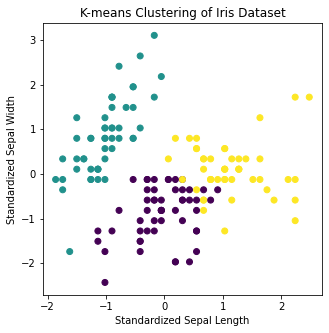

In [18]:
'''
Using a k-means cluster for the Iris.csv dataset.
'''


import pandas as pd
import numpy as np
from IPython.display import display, Markdown
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Iris dataset
path = "/content/drive/MyDrive/AI ACADEMY/1- Computer Programming with Python/Week 10 -Notebooks/wk10 student/Iris.csv"
iris_df = pd.read_csv(path)

# Function to calculate mean, median, and mode
def calculate_stats(column):
    mean = column.mean()
    median = column.median()
    mode = column.mode().iloc[0]
    return mean, median, mode

# Functions for standardization and normalization
def standardize(column):
    return (column - column.mean()) / column.std()

def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Iterate through numerical columns, calculate stats, and apply standardization and normalization
for col in iris_df.columns[:-1]:
    column = iris_df[col]
    mean, median, mode = calculate_stats(column)
    display(Markdown(f"**{col}:** Mean={mean:.2f}, Median={median:.2f}, Mode={mode:.2f}"))
    
    standardized_column = standardize(column)
    normalized_column = normalize(column)

    iris_df[f"{col}_standardized"] = standardized_column
    iris_df[f"{col}_normalized"] = normalized_column

# Perform k-means clustering; taken from https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
kmeans = KMeans(n_clusters=3, random_state=0)
iris_df["cluster"] = kmeans.fit_predict(iris_df[["SepalLengthCm_standardized", "SepalWidthCm_standardized", "PetalLengthCm_standardized", "PetalWidthCm_standardized"]])

# Create a scatter plot of the clusters
fig = plt.figure(figsize=(5, 5))
plt.scatter(iris_df["SepalLengthCm_standardized"], iris_df["SepalWidthCm_standardized"], c=iris_df["cluster"], cmap="viridis")
plt.xlabel("Standardized Sepal Length")
plt.ylabel("Standardized Sepal Width")
plt.title("K-means Clustering of Iris Dataset")
plt.show()



## 10.2 VISUALIZATION (Follow)

**Learning Objectives**
1. Understand importance of Visualization
2. Learn visualization techniques
3. Learn to relate data to visual graphs

In [9]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/AI ACADEMY/1- Computer Programming with Python/Week 10 -Notebooks/wk10 student/Iris.csv")

### BOX PLOT

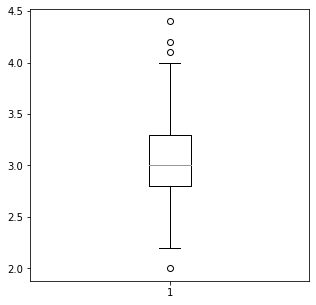

In [11]:
import matplotlib.pyplot as plt

#https://www.simplypsychology.org/boxplots.html#:~:text=What%20is%20a%20box%20plot,(or%20percentiles)%20and%20averages.

fig = plt.figure(figsize =(5, 5))
 
plt.boxplot(df['SepalWidthCm'])

plt.show()

### SCATTER PLOT

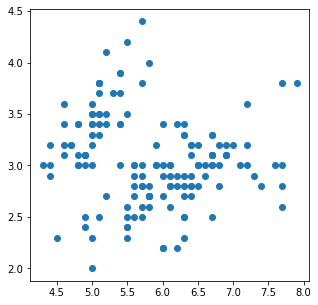

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(5, 5))
 
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])

plt.show()

### HISTOGRAM

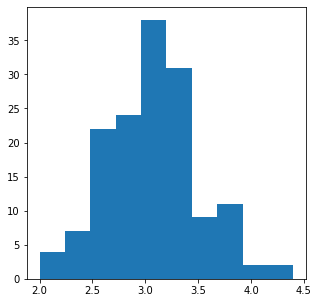

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(5, 5))
 
plt.hist(df['SepalWidthCm'])

plt.show()

### BAR PLOT

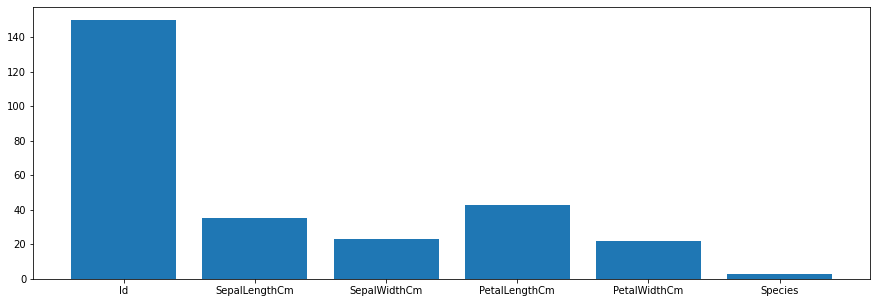

In [13]:
#https://keydifferences.com/difference-between-histogram-and-bar-graph.html#:~:text=Histogram%20refers%20to%20a%20graphical%20representation%3B%20that%20displays%20data%20by,frequency%20distribution%20of%20continuous%20variables.

import matplotlib.pyplot as plt

fig = plt.figure(figsize =(15, 5))
 
plt.bar(df.columns,list(df.nunique()))

plt.show()

### PIE CHART

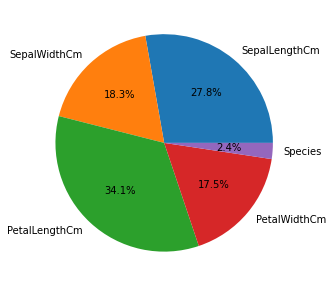

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(15, 5))
 
plt.pie(list(df.nunique())[1:],labels = df.columns[1:], autopct = '%.1f%%')

plt.show()

**Evaluation:**

After running this program, think about and answer these questions:

1. What does each graph represent?
2. Try looking up the documentation for each visualization and add more changes to the graphs.
3. What can be concluded from each of the representations?

## 10.2 VISUALIZATION (Group)

Write a program that will do the following:

1. Use the heart dataset.
2. Generate a:
    - Box Plot
    - Scatter Plot
    - Histogram
    - Bar Plot
    - Pie Chart
3. Use Columns of your liking. (The visualization must give appropriate and useful information)

### BOX PLOT

### SCATTER PLOT

### HISTOGRAM

### BAR PLOT

### PIE CHART

# 10.3 PROJECT (Group)

**Write a program that will do the following:**
1. Read in the following 2 files:  NCEL-Cash5.csv and NCEL-Cash5-Detailed.csv
2. Calculate the return on investment (ROI) from playing the same 5 numbers every time the game is offered.
3. Calculate the ROI from playing 5 random numbers on each draw.
4. For an added challenge, change this calculation to occur starting at an arbitrary start date (rather than the beginning of the data set).
5. For an even greater challenge, run multiple trials for the above setup and report the average ROI for all trials.

**Notes for calculating winnings:**
1. Ball order does not matter.
2. Costs \\$1 for each draw (ie. \\$2 for days that have double play)
3. Each draw is five numbers and range from 1 to 43
4. May 15, 2014 balls drawn changed from 39 -> 41
5. Nov 4, 2018  balls drawn changed from 41 -> 43

**Winners are as follows:**
1. Match 0 balls = \$0
2. Match 1 ball = \$0
3. Match 2 balls = \$1
4. Match 3 balls = \$5
5. Match 4 balls = use prize_4 or prize_4_double_play from Detailed file
6. Match 5 balls = use prize_5 or prize_5_double_play from Detailed file


**Output the following:**
1. 5 numbers played
2. dollars spent playing
3. dollars won
4. return on investment as a percentage


**Just for fun: What happened on July 11, 2007?**
&nbsp;


<center> <b> NCEL-Cash5.csv format: </b> </center>

| Date:  | Ball N:  | DP: 0 - False, 1 - True |
|--------|----------|-------------------------|
|date of drawing | winning ball numbers  | "Double Play" | 
| (m/d/Y) | in order drawn | , or second play of the day. |
|         |           |  First introduced 4/25/2021 |                             

&nbsp;  

<center> <b> NCEL-Cash5-Detailed.csv format: </b> </center>


| Date: | prize_n: | winners_n: | *_double_play_*: |
|-------|----------|------------|------------------|
| date of drawing | prize amount for matching | winner count for | double play value |
| (m/d/Y) | n numbers correctly | matching n numbers. |for that winner amount or prize pool. |
